#### 1. import modules

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException
import pandas as pd

#### 2. Define the chrome driver

In [2]:
options = webdriver.ChromeOptions()
options.add_argument("--lang=en-US")

# ban the picture and css for faster speed
prefs = {"profile.managed_default_content_settings.images": 2, 'permissions.default.stylesheet': 2}
options.add_experimental_option("prefs", prefs)

# dirver initialization
# remeber the chrome driver location
# C:\Users\V530\Downloads\chromedriver.exe"
driver = webdriver.Chrome(service=Service(r'D:\software\amazon_scrape\chromedriver_win32\chromedriver.exe'),options=options)
driver.set_page_load_timeout(10)

After running the code
    
    it will open a chrome opened by the driver automation, which is normal
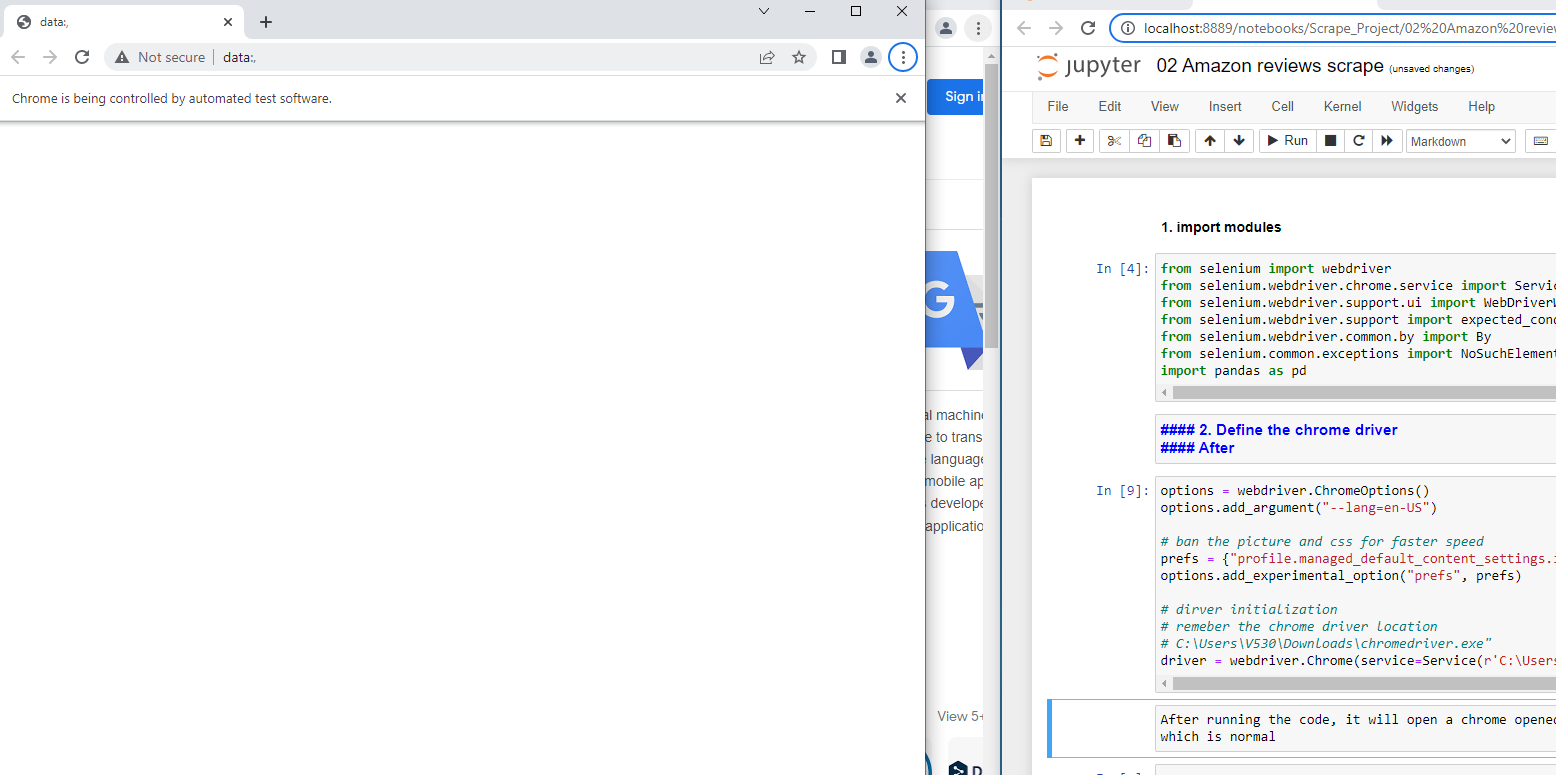
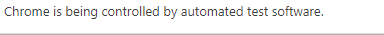

#### 3. define the weblist you want to scrape

In [15]:
#folder to store the scraped reviews
product_folder = 'D:/research/data/reviews/amazon/headphone/'

web_dict = {
    'MOVSSOU E7 Active Noise Cancelling': "https://www.amazon.com/Active-Noise-Cancelling-Headphones-Comfortable/product-reviews/B095BV8R27/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber="
}

# also define the maxinum page for reviews or you need (try exception module)
# still may face problem, depend on youself want or not
# the maxium page for amzone is 500
web_pages = {
    #'01_Amazon Essentials': 500,
    #'02_Columbia Men': 459
    'MOVSSOU E7 Active Noise Cancelling': 50 #change this number to the "total reviews/10" you want to scrape, i.e. if there are 3000 reviews to scrape, then this value is 3000/10 = 300
}

# A page have about 10 reviews, sometimes i face problems
    # you for 6460 reviews, set 500
    # because the maxium is 500 page for amazone
    
    # for 4590 reviews, set 459 page

## first produt reviews page
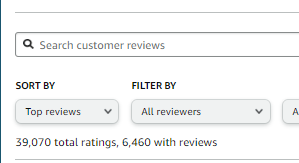
## second produt reviews page
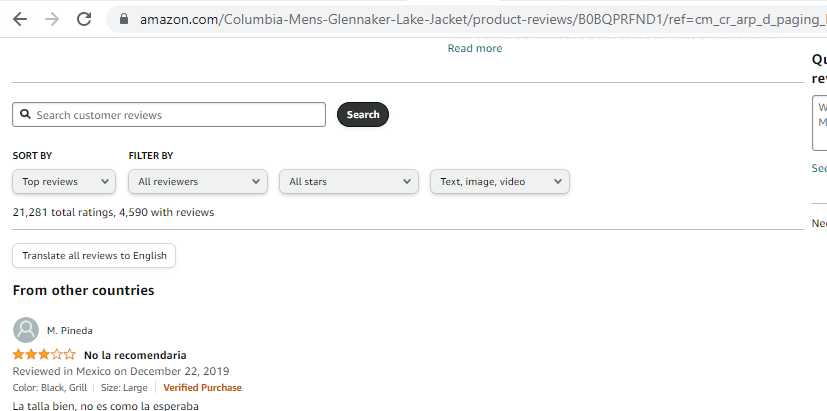

#### 4. Scrape the reviews

In [13]:
css_path_reviews = "[class='a-row a-spacing-small review-data'] > [data-hook='review-body'] > span"

In [16]:
import time
# open the url for driver
for name, url in web_dict.items():
    reviews_list = []
    for i in range(2, web_pages[name]):
        driver.get(url+str(i))
        # time sleep for avoiding detect, advise set it a little large
        time.sleep(2)
        review_elements = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, css_path_reviews)))
        for j in range(len(review_elements)):
            reviews_list.append({'product': name,'review': review_elements[j].text})
        
    pd.DataFrame(reviews_list).to_csv(product_folder+name+".csv")
        

# sometime you face the login problem
# just login and reconduct above code, it works
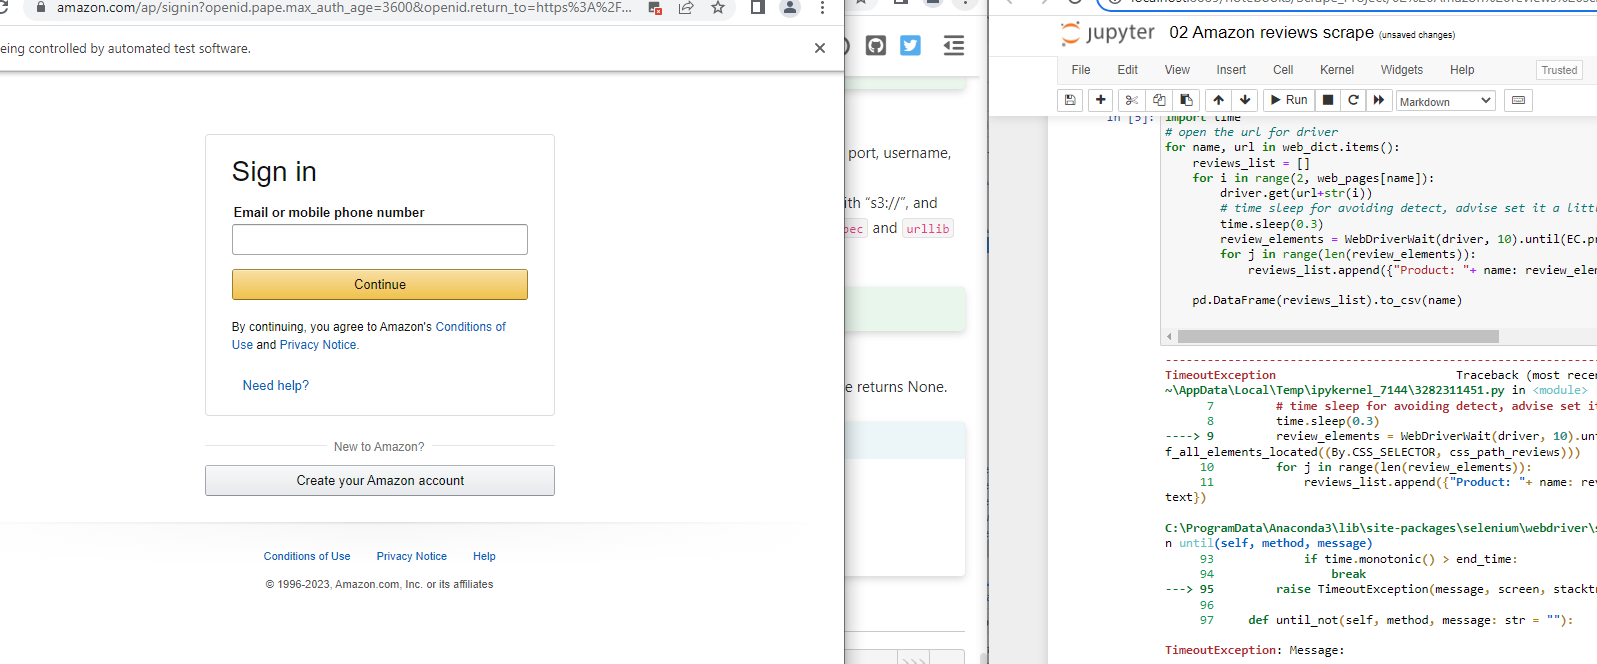